In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,precision_score,confusion_matrix
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV,RepeatedStratifiedKFold,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df = pd.read_csv("water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
df["ph"] = df["ph"].fillna(value=df["ph"].mean())
df["Sulfate"] = df["Sulfate"].fillna(value=df["Sulfate"].mean())
df["Trihalomethanes"] = df["Trihalomethanes"].fillna(value=df["Trihalomethanes"].mean())

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


C:\Users\Aditya Raj\AppData\Local\Temp\ipykernel_11940\1136307090.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="Potability", palette="deep")


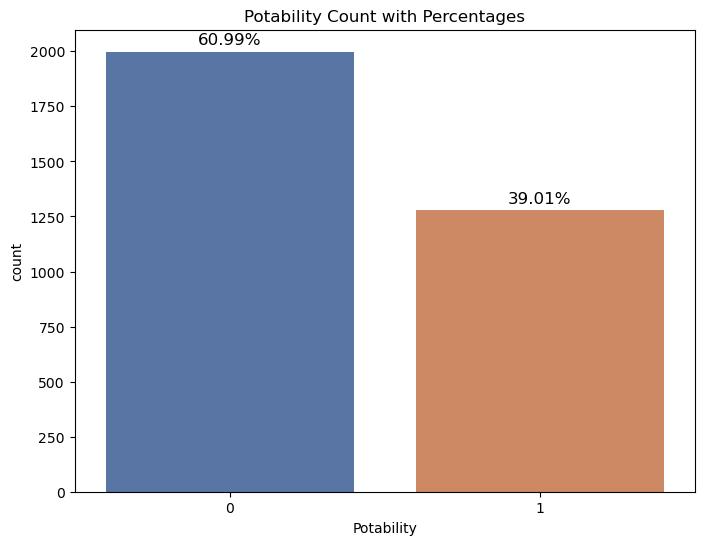

In [7]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x="Potability", palette="deep")

# Calculate percentages
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%'
    ax.annotate(percentage, 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'baseline', 
                fontsize = 12, color = 'black', xytext = (0, 5), 
                textcoords = 'offset points')

# Show plot
plt.title("Potability Count with Percentages")
plt.show()

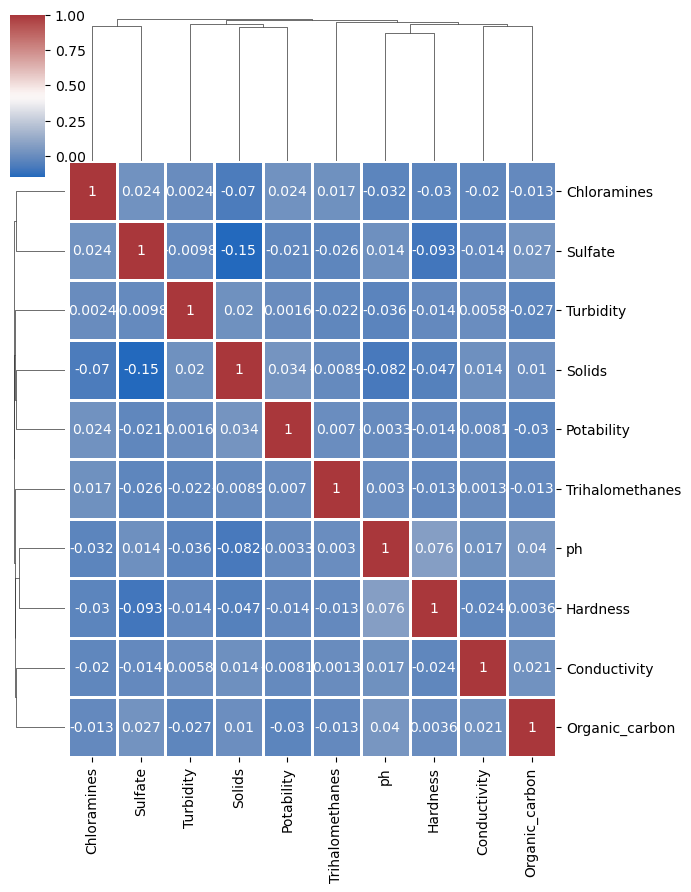

In [8]:
sns.clustermap(df.corr(), cmap="vlag",dendrogram_ratio=(0.1,0.2),annot=True,linewidth=.8,figsize=(7,9))

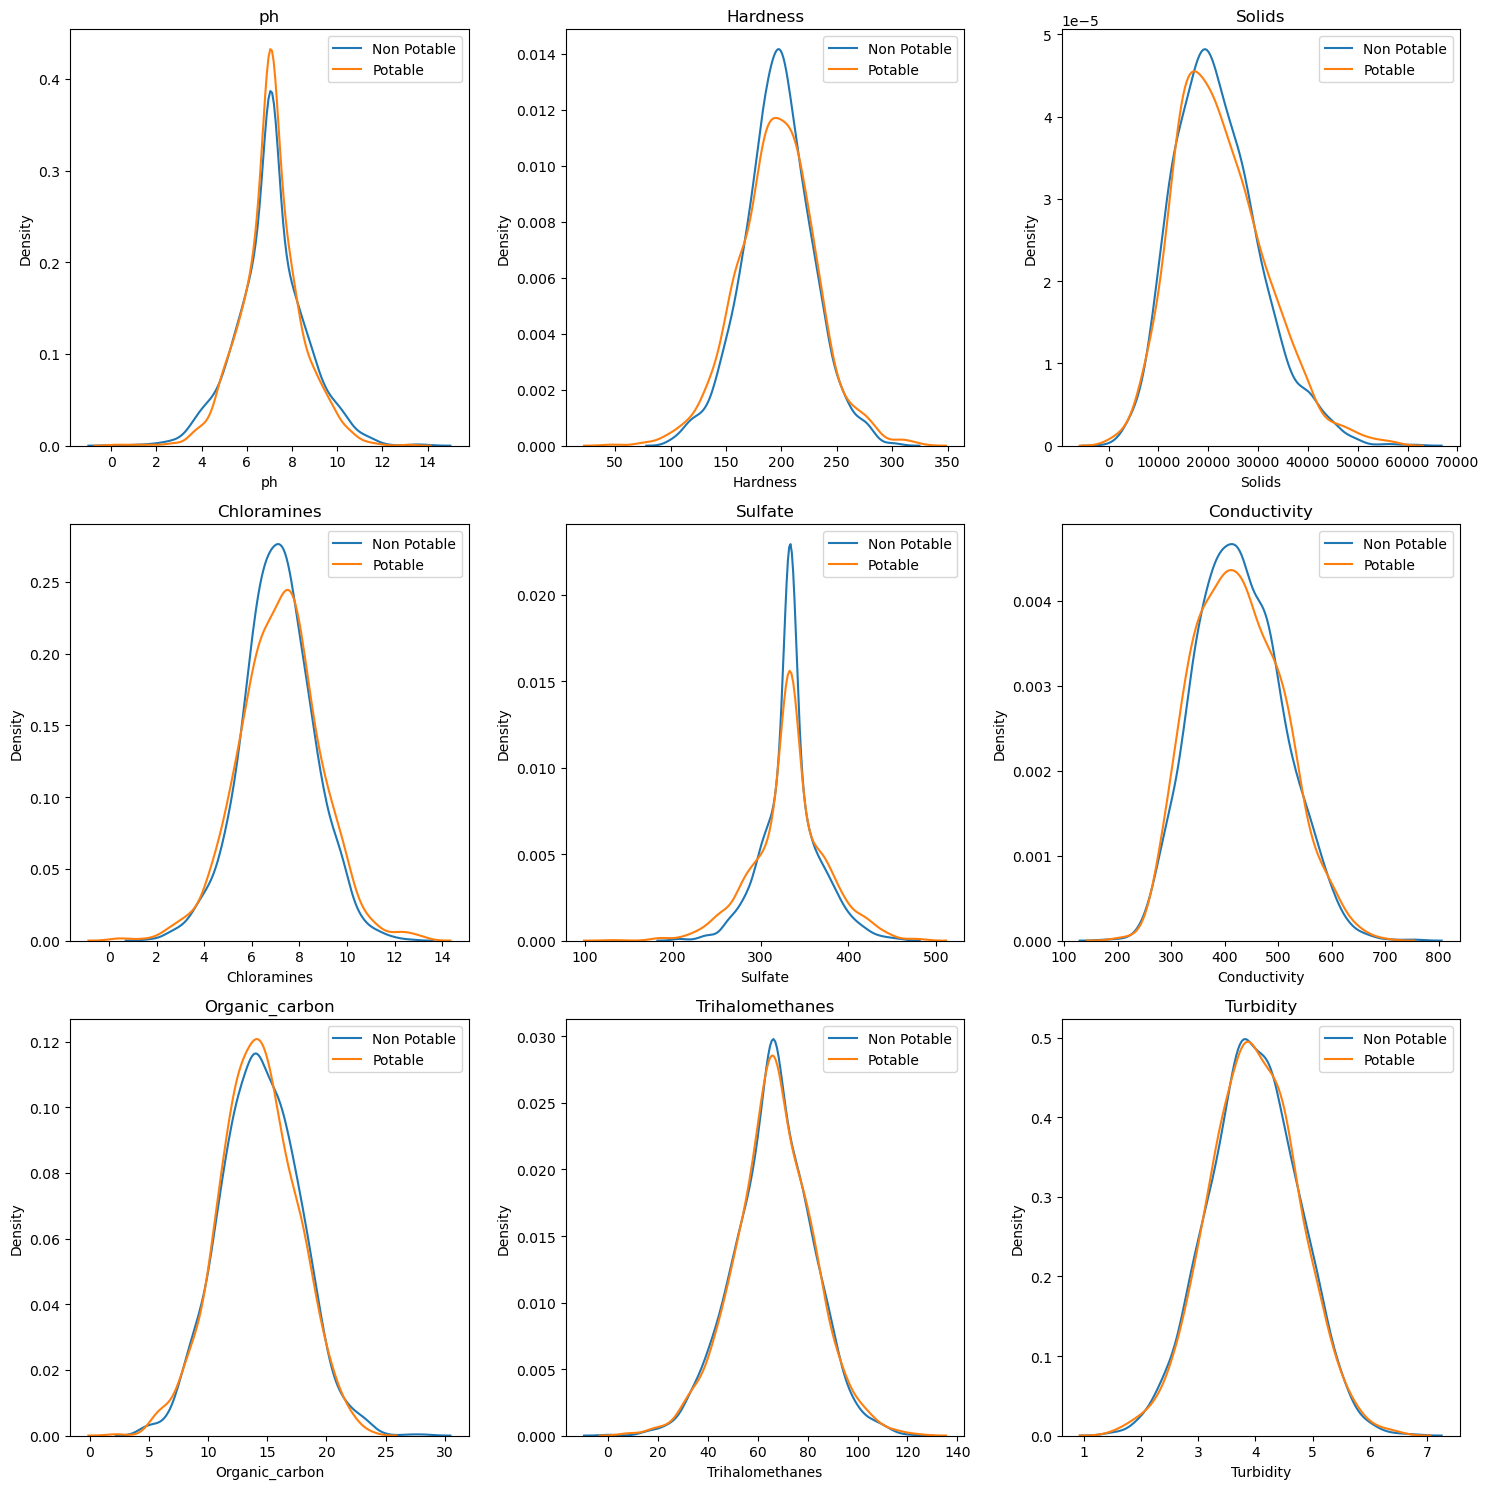

In [9]:
potability_zero = df.query("Potability == 0")
potable = df.query("Potability == 1")

plt.figure(figsize = (15,15))
for ax, col in enumerate(df.columns[:9]):
    plt.subplot(3,3,ax+1)
    plt.title(col)
    sns.kdeplot(x=potability_zero[col],label = "Non Potable")
    sns.kdeplot(x = potable[col],label = "Potable")
    plt.legend()
plt.tight_layout()

<Axes: xlabel='ph', ylabel='Potability'>

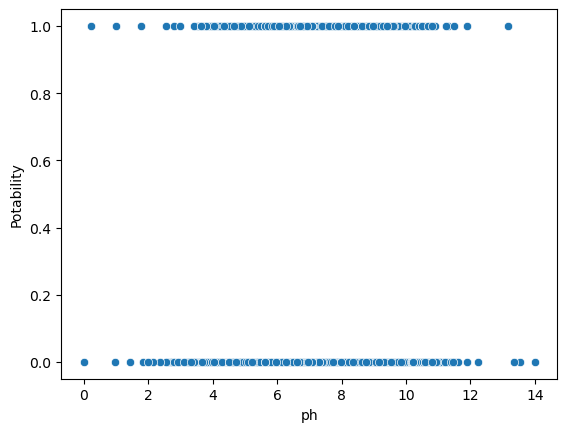

In [10]:
sns.scatterplot(x="ph",y="Potability",data=df)

In [11]:
X = df.drop("Potability",axis=1)
y= df["Potability"]

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13)

In [13]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [14]:
models =[
    ("Decision Tree Classifier", DecisionTreeClassifier(max_depth=3)),
    ("Random Forest", RandomForestClassifier())
]

In [15]:
finalResults = []

cmList = []

for name, model in models:
    model.fit(X_train_scaled,y_train)
    model_result = model.predict(X_test_scaled)
    score = precision_score(y_test,model_result)
    cm = confusion_matrix(y_test, model_result)

    finalResults.append((name,score))
    cmList.append((name,cm))
finalResults

[('Decision Tree Classifier', 0.6103896103896104),
 ('Random Forest', 0.6312056737588653)]

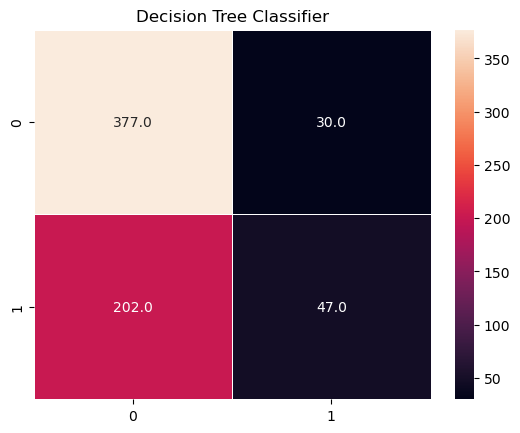

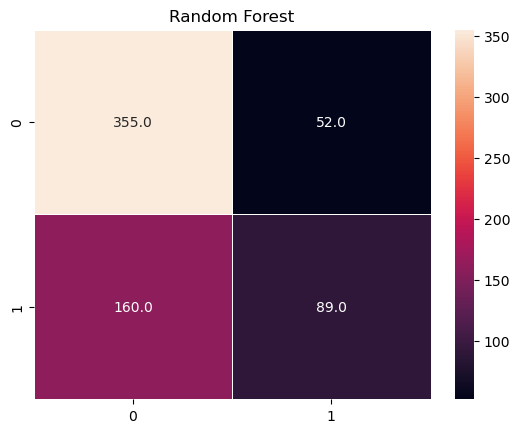

In [16]:
for name, i in cmList:
    plt.figure()
    sns.heatmap(i,annot=True,linewidths=0.7,fmt=".1f")
    plt.title(name)
    plt.show

In [17]:
model_params = {
    "Random Forest" :
    {
        "model": RandomForestClassifier(),
        "params":
        {
            "n_estimators":[10,50,100,200,500],
            "max_features":["auto","sqrt","log2"],
            "max_depth":list(range(1,15,3))
        }
    }
}
model_params

{'Random Forest': {'model': RandomForestClassifier(),
  'params': {'n_estimators': [10, 50, 100, 200, 500],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth': [1, 4, 7, 10, 13]}}}

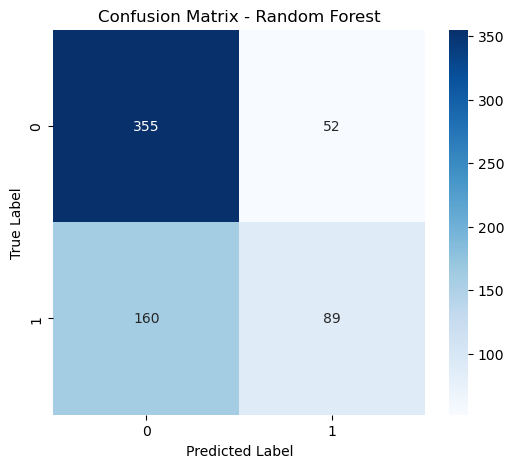

In [20]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Interpretition


### 1.Potable water samples tend to have balanced levels across parameters like pH, hardness, sulfate, organic carbon, and THMs. These samples are clearer, with lower turbidity and conductivity, indicating fewer impurities.

### 2.Non-potable water samples may have irregularities in pH, high solids, conductivity, turbidity, and elevated levels of organic carbon and THMs, reflecting contamination.